In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [227]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'iris_dataset.csv', 'KMeansClustering.ipynb', 'OutlierFinding&Standarization.ipynb', 'Practice-1.ipynb', 'Practice-2.ipynb', 'Practice-3.ipynb', 'PreprocessingPart1.ipynb', 'TextPrepsocessingPart-1.ipynb', 'titanic_dataset.csv']


In [228]:
dict_list = {'A':[1,2,3,4,5],
             'B':[23,34,456,7,90]}

df = pd.DataFrame(dict_list)
df

,A,B
0,1,23
1,2,34
2,3,456
3,4,7
4,5,90


In [229]:
df['C'] = pd.DataFrame([22,33,44,55,66])
df

,A,B,C
0,1,23,22
1,2,34,33
2,3,456,44
3,4,7,55
4,5,90,66


In [230]:
df_x = df.drop(columns=['A'],axis=1)
# df_x[df_x]
df_x.at[2, 'B'] = 99
df_x

,B,C
0,23,22
1,34,33
2,99,44
3,7,55
4,90,66


In [231]:
c1 = df_x['C']
c1[c1>44]=0
df_x["C"]=c1
df_x

,B,C
0,23,22
1,34,33
2,99,44
3,7,0
4,90,0


<Axes: >

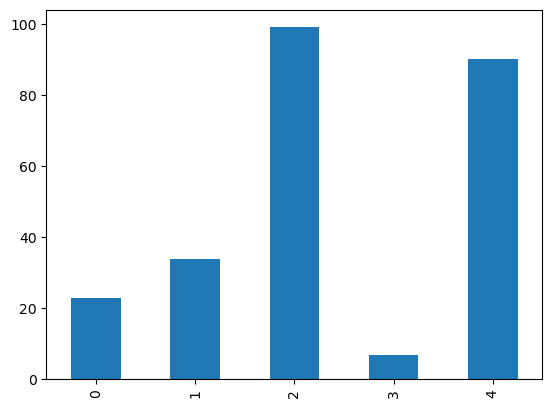

In [232]:
df_x['B'].plot(kind='bar')

<Axes: >

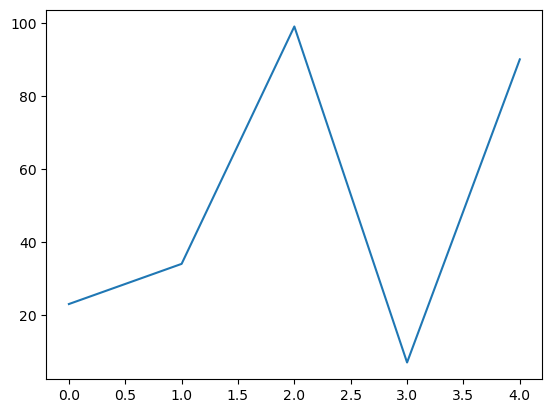

In [233]:
df_x["B"].plot()

<Axes: >

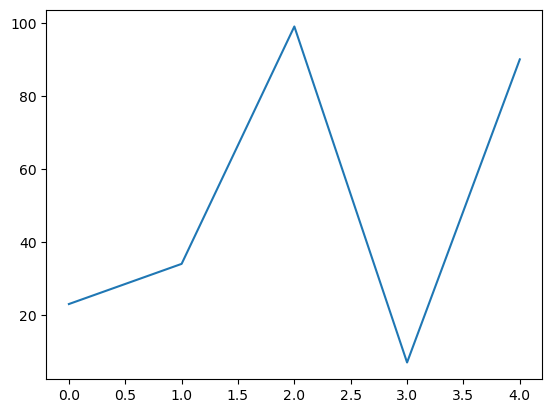

In [234]:
df_x["B"].plot(kind='line')

<Axes: xlabel='B', ylabel='C'>

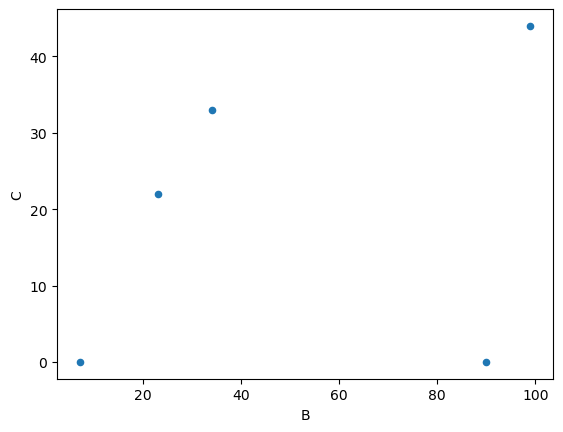

In [235]:
df_x.plot(kind='scatter', x="B", y="C")

<Axes: ylabel='Frequency'>

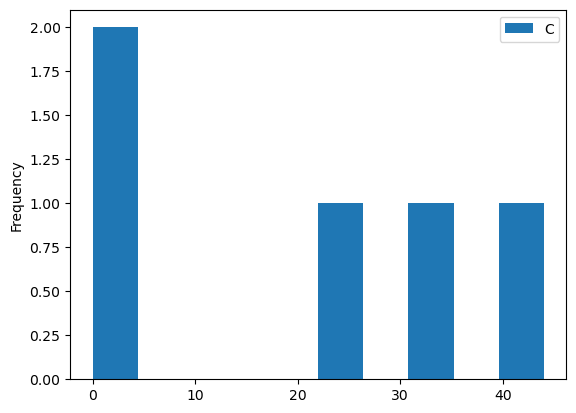

In [236]:
df_x.plot(kind='hist',x='B')

B       Axes(0.125,0.11;0.352273x0.77)
C    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

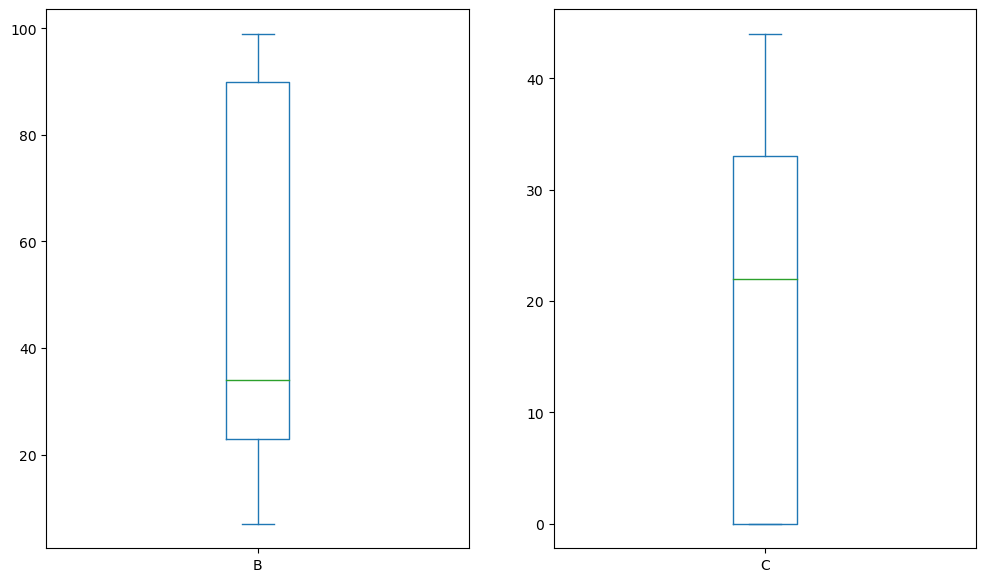

In [237]:
df_x.plot(kind='box', subplots=True, figsize=(12,7))

             A
Category 1  40
Category 2  30
Category 3  20
Category 4  10


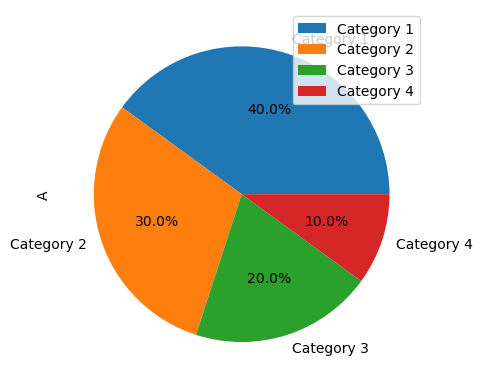

In [238]:
df = pd.DataFrame({'A': [40, 30, 20, 10]}, index=['Category 1', 'Category 2', 'Category 3', 'Category 4'])
print(df)
df.plot(kind='pie', y='A', autopct='%1.1f%%')
plt.show()

<Axes: ylabel='B'>

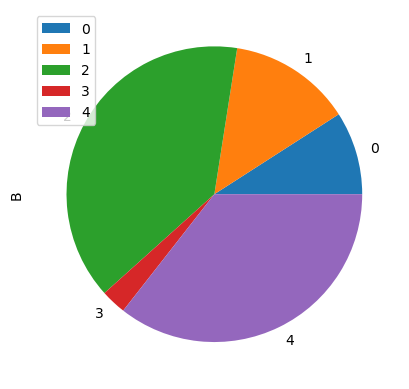

In [239]:
df_x.plot(kind='pie', y='B')

array([<Axes: ylabel='B'>, <Axes: ylabel='C'>], dtype=object)

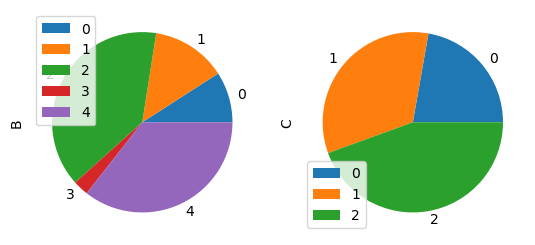

In [240]:
df_x.plot(kind='pie', subplots=True)

array([<Axes: >], dtype=object)

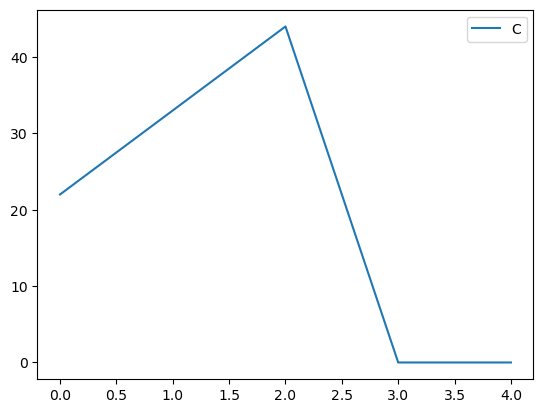

In [241]:
df_x.plot(kind='line', y = ['C'],subplots=True)

In [279]:
data = pd.read_csv("titanic_dataset.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [281]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [282]:
data.select_dtypes(include=['float']).columns

Index(['Age', 'Fare'], dtype='object')

In [283]:
temp_age = data.Age
temp_age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [284]:
from sklearn.preprocessing import LabelEncoder
data[['Sex', 'Embarked']] = data[['Sex', 'Embarked']].apply(LabelEncoder().fit_transform)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [285]:
data['Age'] = [data.Age.mean() if np.isnan(i) else i for i in data.Age]

In [286]:
data_x = data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
data_y = data[['Survived']]

In [287]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [288]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.8,random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(178, 7) (178, 1) (713, 7) (713, 1)


In [289]:
from xgboost import XGBClassifier

xgb_cls = XGBClassifier(n_estimators=100,
                        learning_rate=0.3,
                        max_depth=10)
xgb_cls

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [290]:
xgb_cls.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [291]:
pred = xgb_cls.predict(x_test)
pred[:5]

array([0, 0, 0, 1, 0])

In [292]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(pred, y_test))
print(accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

[[363  92]
 [ 73 185]]
0.7685834502103787
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       455
           1       0.67      0.72      0.69       258

    accuracy                           0.77       713
   macro avg       0.75      0.76      0.75       713
weighted avg       0.77      0.77      0.77       713



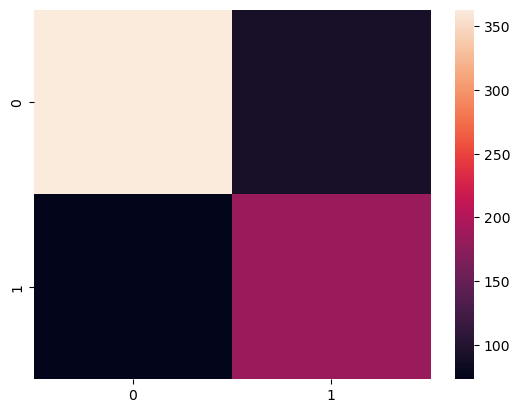

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(pred, y_test))
plt.show()

In [294]:
df = pd.DataFrame({'column_name':data_x.columns,'features_importance':xgb_cls.feature_importances_})
df

,column_name,features_importance
0,Pclass,0.141406
1,Sex,0.491240
2,Age,0.059256
3,SibSp,0.037061
4,Parch,0.143778
5,Fare,0.061639
6,Embarked,0.065619


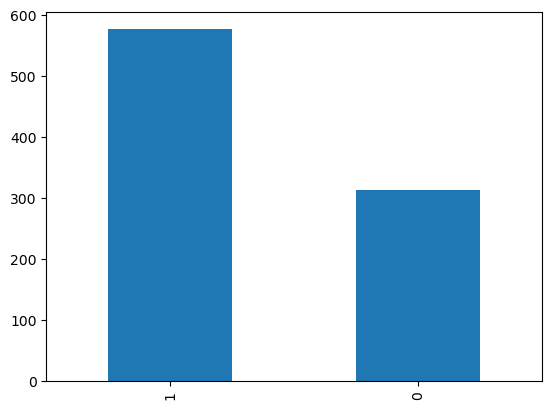

In [295]:
data.Sex.value_counts().plot(kind='bar')
plt.show()

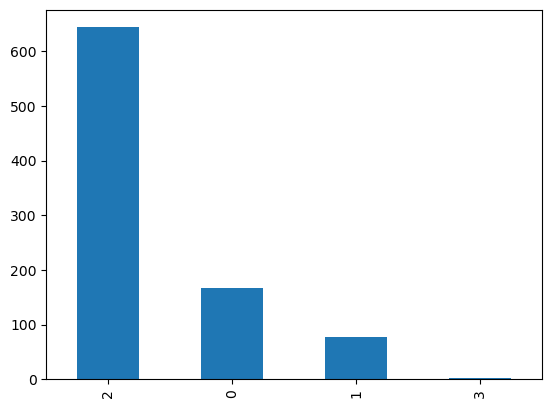

In [296]:
data.Embarked.value_counts().plot(kind='bar')
plt.show()

In [297]:
# set(data.Embarked)

<Axes: xlabel='Sex', ylabel='count'>

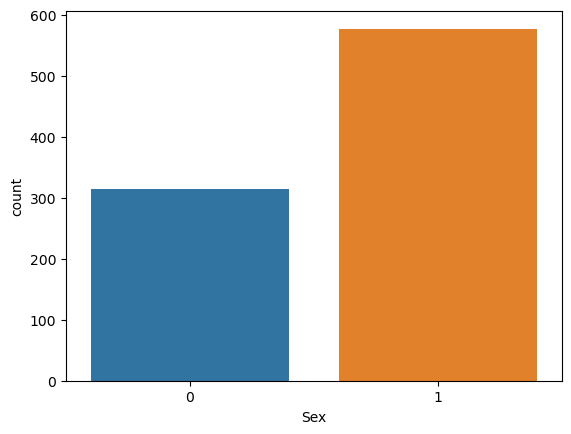

In [301]:
sns.countplot(x=data.Sex)

<Axes: xlabel='Embarked', ylabel='count'>

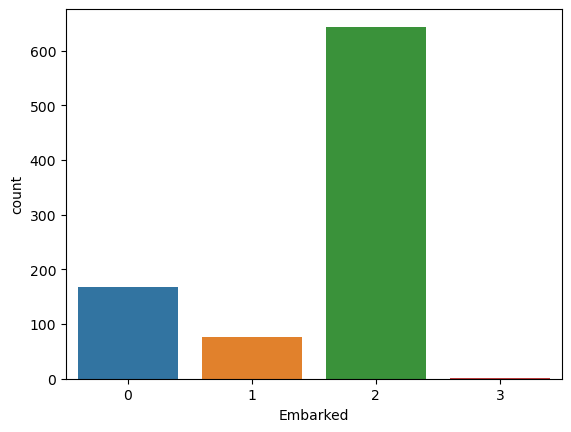

In [300]:
sns.countplot(x=data.Embarked)

<Axes: ylabel='count'>

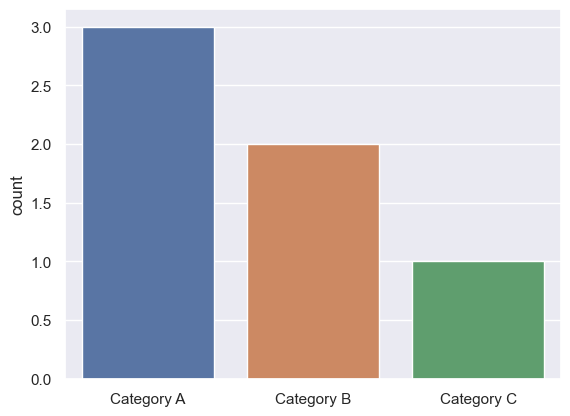

In [302]:
# Sample data (replace with your own dataset)
data = ['Category A', 'Category B', 'Category A', 'Category C', 'Category B', 'Category A']

# Create a countplot
sns.set(style="darkgrid")  # Optional: Set the plot style
sns.countplot(x=data) #, palette="Set3")  # 'x' specifies the categorical variable to plot
